## Kaggle: Red Wine EDA
### Author: Zach Palmer
### Work Period: 12/15 - TBD 

### Environment Setup

In [1]:
# import packages and setup environment

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from plotnine import *

### Read Data and Provide a Quick Overview of its Contents

In [2]:
wine_df = pd.read_csv("winequality-red.csv")

In [3]:
# describe() prints the summary statistics of all numeric columns
wine_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [4]:
# info prints the data types, missing values, and data size of a DataFrame
wine_df.info(show_counts = True, memory_usage = True, verbose = True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
# get the number of rows and columns
wine_df.shape

(1599, 12)

In [6]:
# check for null values

# by column
wine_df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [7]:
# total sum
wine_df.isnull().sum().sum()

# if we needed to remove missing values we could use 
# wine_df = wine_df.dropna() to remove them

# we could also replace the missing values with the mean for the respective column

# get the mean of ph
# pH_mean = wine_df['pH'].mean()

# fill the missing values using .fillna()
# wine_df = wine_df.fillna(pH_mean)

0

In [8]:
# head() and tail() print the start and end of the dataframe respectively 
wine_df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [9]:
wine_df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [10]:
# if we needed to rename columns, we can use .rename() to alter the DataFrame
# wine_df.rename(columns = {'quality':'grade'}, inplace = True)

# we could also directly assign the column titles using a list
# wine_df.columns = [. . .]

## Exploratory Data Analysis (EDA)

### Distribution of Variables

### One Categorical Variable

Initially, all of the data in our DataFrame is continuous. However, if we use unique() on every column of the DataFrame, we will notice something peculiar about the `quality` variable

In [11]:
wine_df.apply(np.unique)

fixed acidity           [4.6, 4.7, 4.9, 5.0, 5.1, 5.2, 5.3, 5.4, 5.5, ...
volatile acidity        [0.12, 0.16, 0.18, 0.19, 0.2, 0.21, 0.22, 0.23...
citric acid             [0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07...
residual sugar          [0.9, 1.2, 1.3, 1.4, 1.5, 1.6, 1.65, 1.7, 1.75...
chlorides               [0.012, 0.034, 0.038, 0.039, 0.040999999999999...
free sulfur dioxide     [1.0, 2.0, 3.0, 4.0, 5.0, 5.5, 6.0, 7.0, 8.0, ...
total sulfur dioxide    [6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 1...
density                 [0.99007, 0.9902, 0.99064, 0.9908, 0.99084, 0....
pH                      [2.74, 2.86, 2.87, 2.88, 2.89, 2.9, 2.92, 2.93...
sulphates               [0.33, 0.37, 0.39, 0.4, 0.42, 0.43, 0.44, 0.45...
alcohol                 [8.4, 8.5, 8.7, 8.8, 9.0, 9.05, 9.1, 9.2, 9.23...
quality                                                [3, 4, 5, 6, 7, 8]
dtype: object

Although `quality` is stored in a continuous format within the DataFrame, the list of its unique values demonstrates how its distribution of values is actually discrete or categorical. Thus, to treat it appropriately, we should cast it to `Categorical` type in order to begin our data exploration (as shown below) 

In [12]:
# convert quality to categorical
wine_df['quality'] = wine_df['quality'].astype('category')

#### Bar Graph with Counts

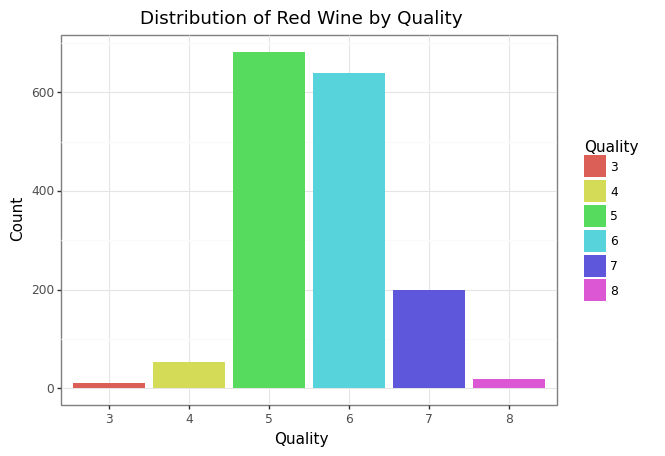

<ggplot: (119217478391)>

In [13]:
(ggplot(wine_df, aes('quality', fill = 'quality'))
 + geom_bar() 
 + theme_bw() 
 + labs(title = 'Distribution of Red Wine by Quality', x = 'Quality', y = 'Count', fill = 'Quality'))

#### Bar Graph with Proportions / Densities

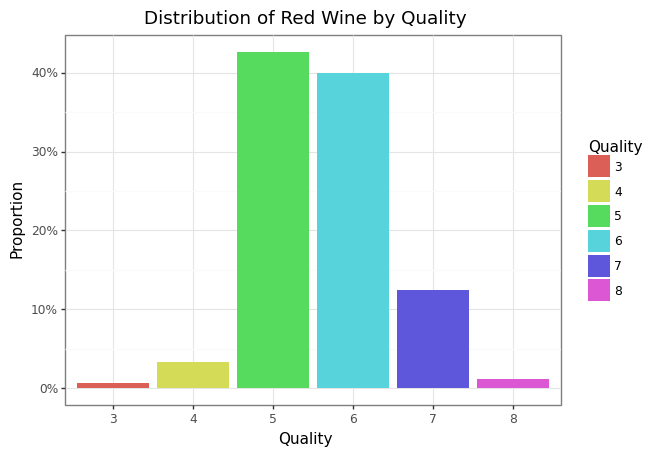

<ggplot: (119217839607)>

In [14]:
from mizani.formatters import percent_format

(ggplot(wine_df, aes('quality', fill = 'quality'))
 + geom_bar(aes(y = '..count../sum(..count..)')) 
 + scale_y_continuous(labels = percent_format())
 + theme_bw() 
 + labs(title = 'Distribution of Red Wine by Quality', x = 'Quality', y = 'Proportion', fill = 'Quality'))

### Two Categorical Variables

All of the variables besides `quality` appear to have a continuous distribution, so there are no visuals to generate for this particular section

### One Continuous Variable

#### Boxplots of Summary Statistics for Each Continuous Variable

In [15]:
long_df = wine_df.melt(id_vars = 'quality')
long_df.head()

,quality,variable,value
0,5,fixed acidity,7.4
1,5,fixed acidity,7.8
2,5,fixed acidity,7.8
3,6,fixed acidity,11.2
4,5,fixed acidity,7.4


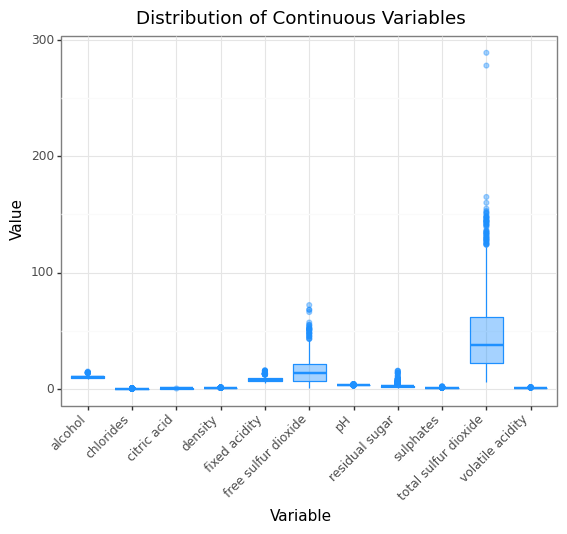

<ggplot: (119217576692)>

In [16]:
(ggplot(long_df, aes(x = 'factor(variable)', y = 'value')) 
+ geom_boxplot(color = 'dodgerblue', fill = 'dodgerblue', alpha = 0.4, outlier_alpha = 0.4)
+ theme_bw()
+ theme(axis_text_x = element_text(angle = 45, vjust = 1, hjust = 1))
+ labs(title = 'Distribution of Continuous Variables', x = 'Variable', y = 'Value'))

In [17]:
dioxide = ['free sulfur dioxide', 'total sulfur dioxide']

dioxide_df = long_df[long_df['variable'].isin(dioxide)]
remaining_df = long_df[~long_df['variable'].isin(dioxide)]

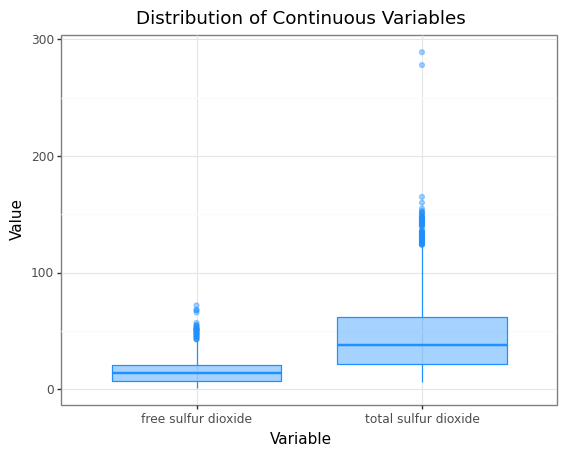

<ggplot: (119217820925)>

In [18]:
(ggplot(dioxide_df, aes(x = 'factor(variable)', y = 'value')) 
+ geom_boxplot(color = 'dodgerblue', fill = 'dodgerblue', alpha = 0.4, outlier_alpha = 0.4)
+ theme_bw()
+ labs(title = 'Distribution of Continuous Variables', x = 'Variable', y = 'Value'))

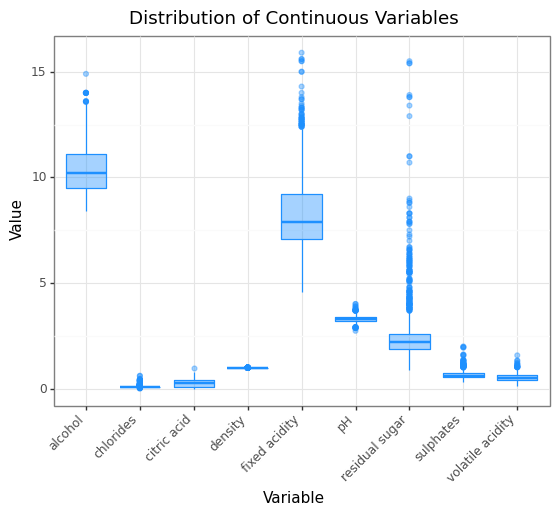

<ggplot: (119217626769)>

In [19]:
(ggplot(remaining_df, aes(x = 'factor(variable)', y = 'value')) 
+ geom_boxplot(color = 'dodgerblue', fill = 'dodgerblue', alpha = 0.4, outlier_alpha = 0.4)
+ theme_bw()
+ theme(axis_text_x = element_text(angle = 45, vjust = 1, hjust = 1))
+ labs(title = 'Distribution of Continuous Variables', x = 'Variable', y = 'Value'))

In [27]:
similar_dist = ['alcohol', 'fixed acidity', 'residual sugar']

high_var = remaining_df[remaining_df['variable'].isin(similar_dist)]
low_var = remaining_df[~remaining_df['variable'].isin(similar_dist)]

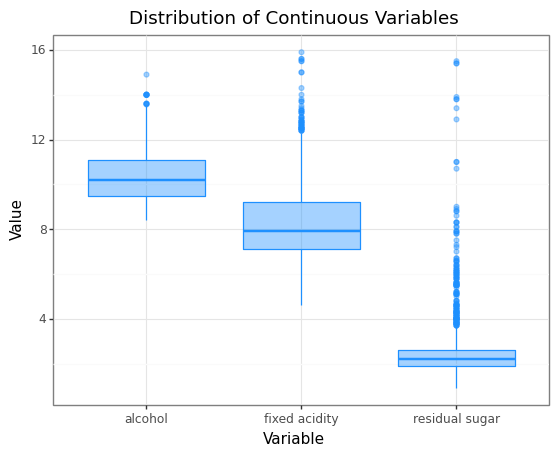

<ggplot: (119221033888)>

In [28]:
(ggplot(high_var, aes(x = 'factor(variable)', y = 'value')) 
+ geom_boxplot(color = 'dodgerblue', fill = 'dodgerblue', alpha = 0.4, outlier_alpha = 0.4)
+ theme_bw()
+ labs(title = 'Distribution of Continuous Variables', x = 'Variable', y = 'Value'))

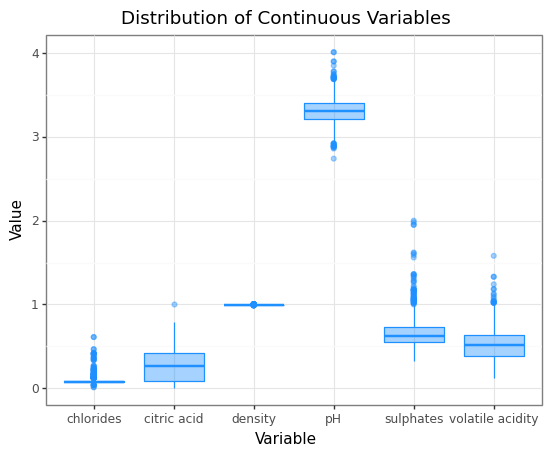

<ggplot: (119220978685)>

In [29]:
(ggplot(low_var, aes(x = 'factor(variable)', y = 'value')) 
+ geom_boxplot(color = 'dodgerblue', fill = 'dodgerblue', alpha = 0.4, outlier_alpha = 0.4)
+ theme_bw()
+ labs(title = 'Distribution of Continuous Variables', x = 'Variable', y = 'Value'))

#### Histograms

c:\Users\Zachary Palmer\AppData\Local\Programs\Python\Python39\lib\site-packages\plotnine\facets\facet.py:446: PlotnineWarning: If you need more space for the y-axis tick text use ... + theme(subplots_adjust={'hspace': 0.25}). Choose an appropriate value for 'hspace'


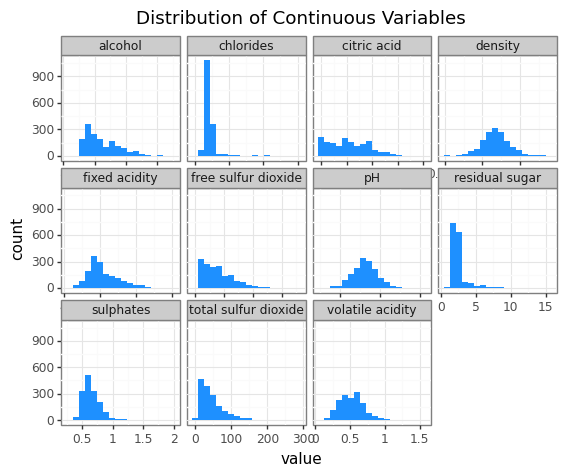

<ggplot: (119220308342)>

In [20]:
(ggplot(long_df, aes(x = 'value')) 
+ geom_histogram(aes(group = 'variable'), bins = 18, fill = 'dodgerblue') 
+ facet_wrap('variable', scales = 'free_x') 
+ theme_bw()
+ theme(axis_text_x = element_text(vjust = 1, hjust = 0.5))
+ labs(title = 'Distribution of Continuous Variables'))

### Continuous Variables Related to the Response `quality`

#### Frequency Plots

c:\Users\Zachary Palmer\AppData\Local\Programs\Python\Python39\lib\site-packages\plotnine\facets\facet.py:446: PlotnineWarning: If you need more space for the y-axis tick text use ... + theme(subplots_adjust={'hspace': 0.25}). Choose an appropriate value for 'hspace'


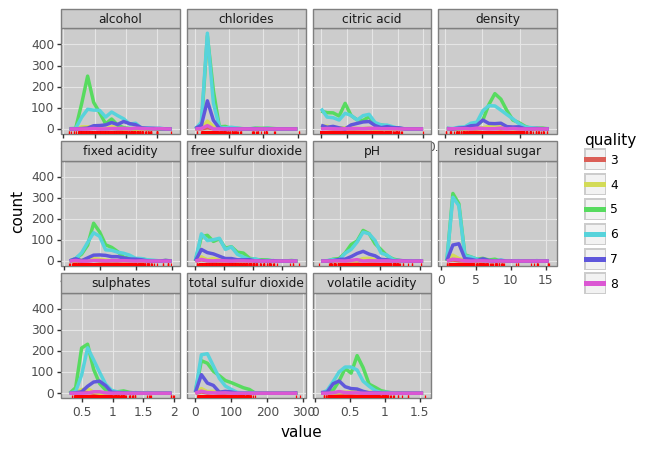

<ggplot: (119228279793)>

In [45]:
(ggplot(long_df, aes(x = 'value')) 
+ geom_rug(color = 'red') 
+ geom_freqpoly(aes(color = 'quality'), bins = 18, size = 1.4) 
+ facet_wrap('variable', scales = "free_x") 
+ theme_bw() 
+ theme(panel_grid_minor = element_blank(), panel_background = element_rect(fill = '0.8')))

#### Correlation Matrix

C:\Users\Zachary Palmer\AppData\Local\Temp\ipykernel_1296\4127337347.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


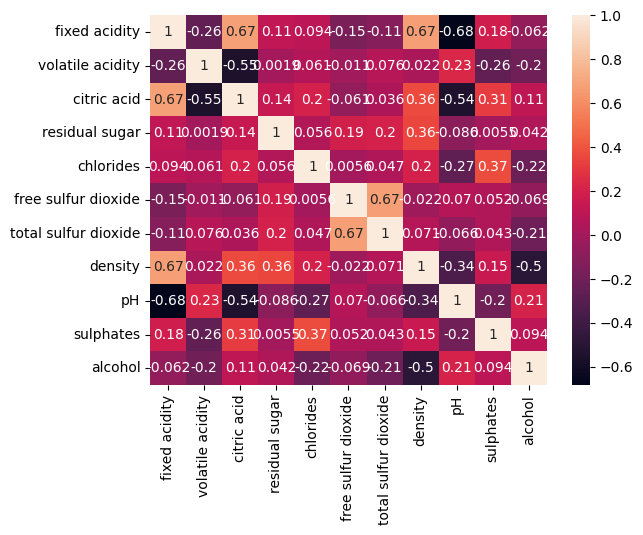

In [40]:
corr_matrix = wine_df.corr()
sns.heatmap(corr_matrix, annot = True)
plt.show()

#### Scatterplots

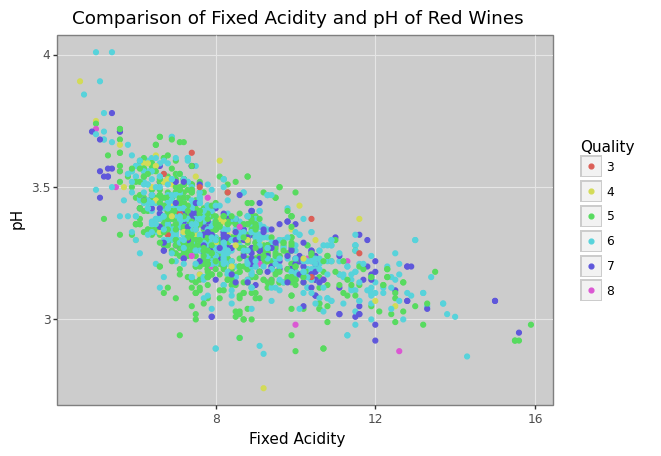

<ggplot: (119228455840)>

In [46]:
(ggplot(wine_df, aes('fixed acidity', 'pH', color = 'factor(quality)'))
+ geom_point() 
+ theme_bw()
+ theme(panel_grid_minor = element_blank(), panel_background = element_rect(fill = '0.8')) 
+ labs(title = 'Comparison of Fixed Acidity and pH of Red Wines', x = 'Fixed Acidity', y = 'pH', color = 'Quality'))